In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('E:/Machine Learning/Projects/Classification/Heart Disease Prediction/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
X = data.drop(['HeartDisease'], axis=1)
Y = data['HeartDisease']

In [6]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

X = pd.get_dummies( data=X,
                    prefix = cat_variables,
                    columns = cat_variables)


In [7]:
print(X.shape, Y.shape)

(918, 20) (918,)


In [8]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

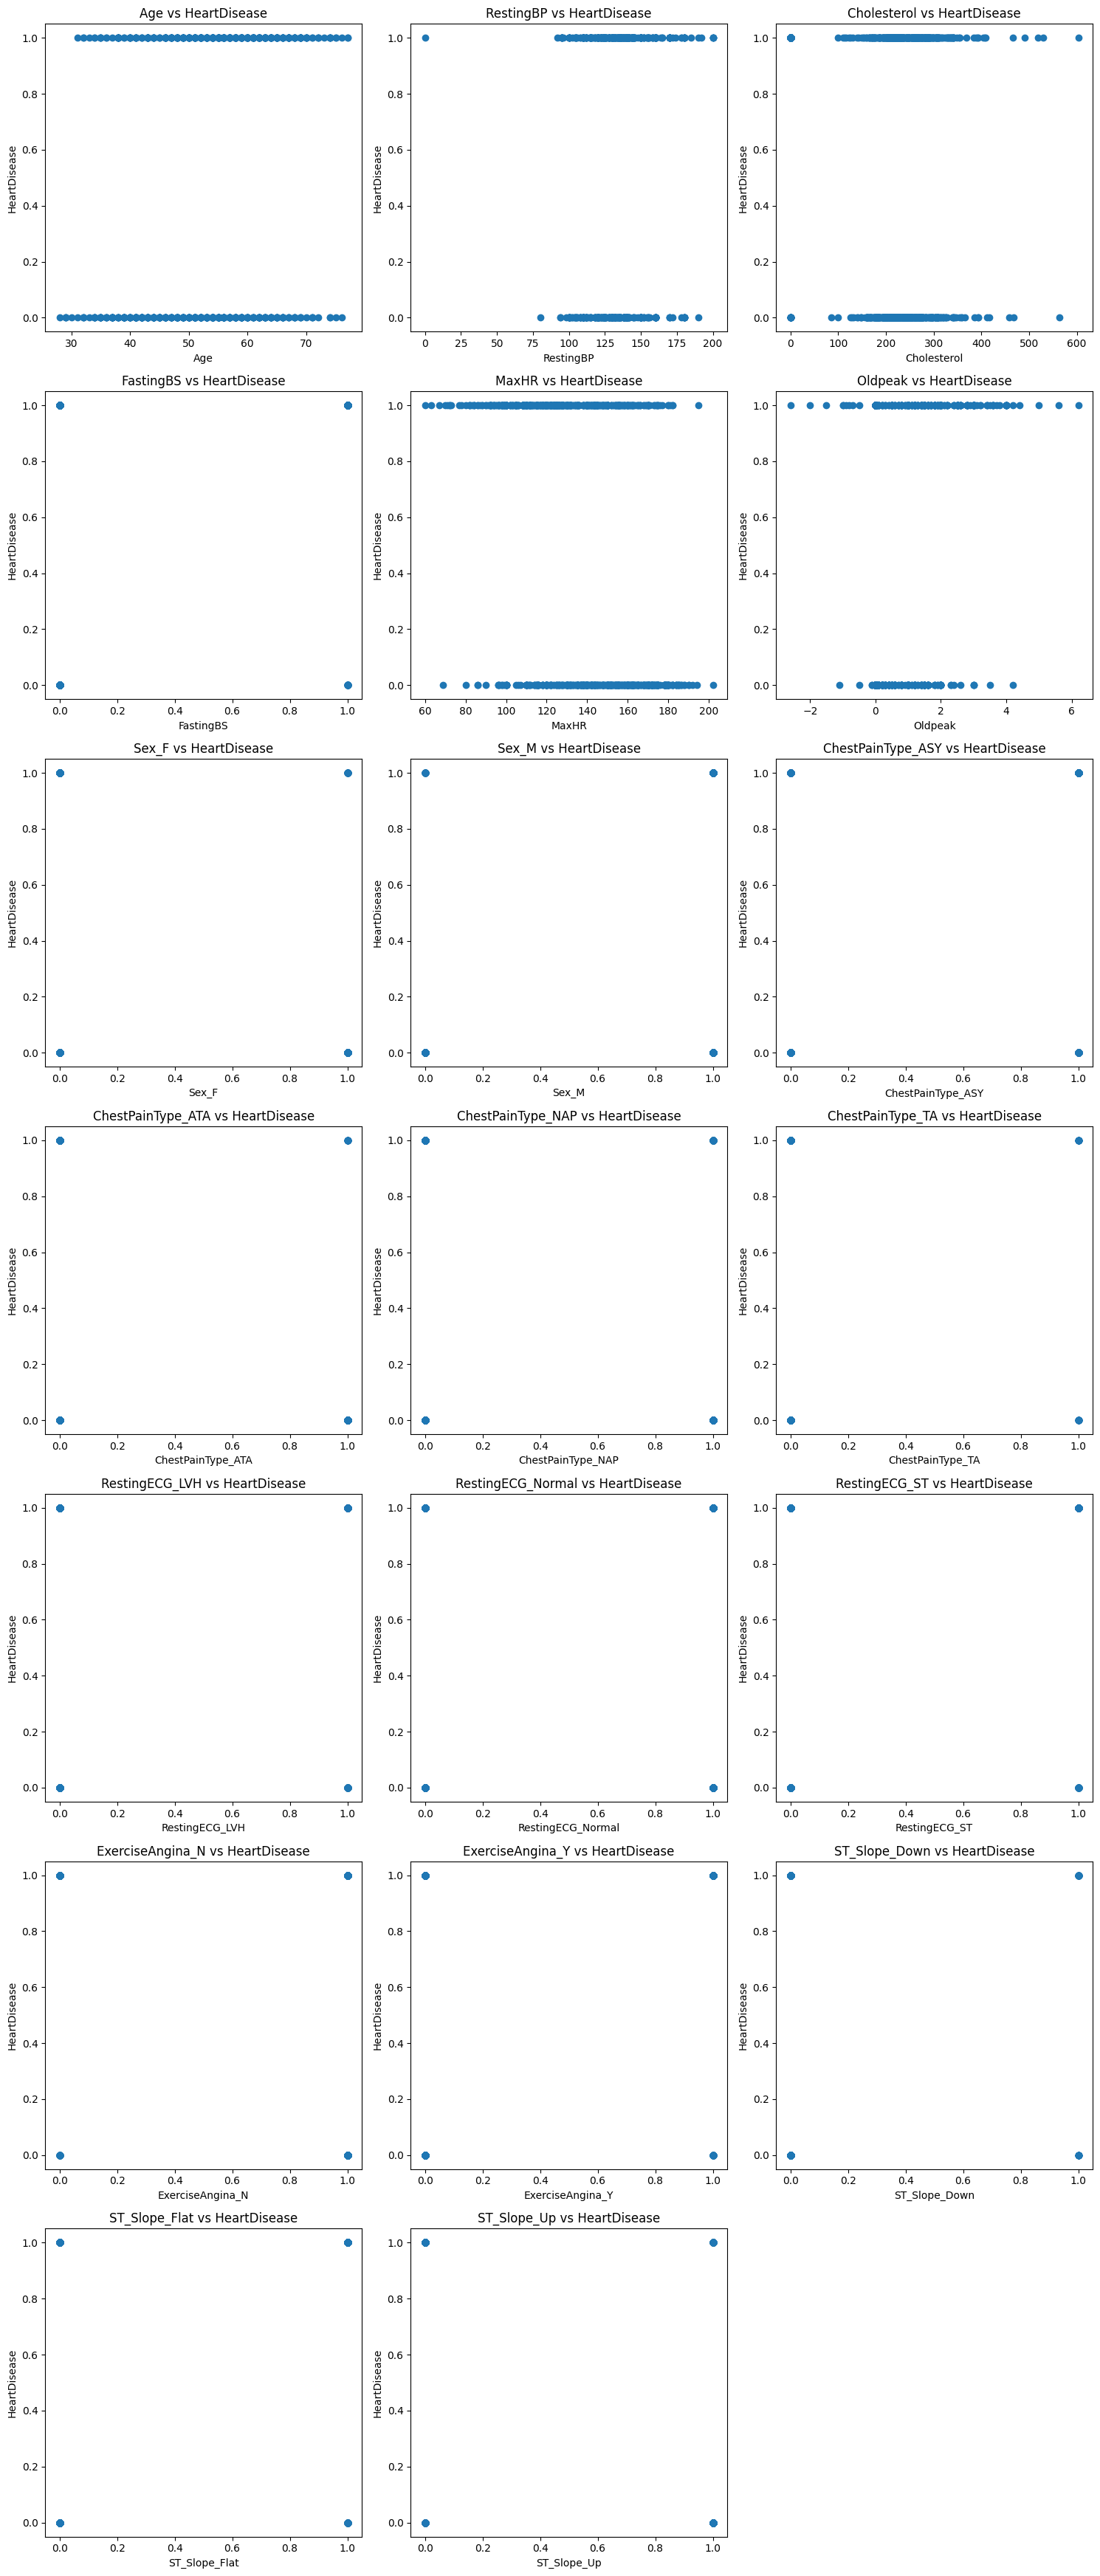

In [10]:
import numpy as np
import math

# Determine the layout of the grid
num_columns = 3
num_rows = math.ceil(len(X.columns) / num_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows*5))

# Flatten the axes array so we can easily iterate over it
axs = axs.flatten()

for i, column in enumerate(X.columns):
    axs[i].scatter(X[column], data['HeartDisease'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('HeartDisease')
    axs[i].set_title(column + ' vs HeartDisease')

# Remove any unused subplots
for i in range(len(X.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [11]:
X = X.drop(['Age'], axis=1)

In [12]:
print(X.shape)

(918, 19)


Spilt train and test data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train, x, y_train, y = train_test_split(X, Y, test_size=0.3, random_state=45)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.66, random_state=45)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(642, 19) (93, 19) (183, 19)
(642,) (93,) (183,)


Parameters for the model as a lists

In [14]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10, 50, 70, 100, 200, 300, 400, 500]

DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier

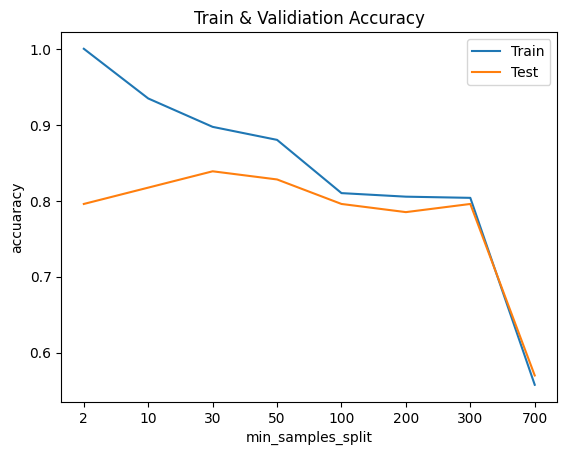

In [16]:
train_accuracy_list = []
val_accuracy_list = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=45).fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    val_prediction= model.predict(x_val)
    train_accuracy = accuracy_score(train_prediction, y_train)
    val_accuracy = accuracy_score(val_prediction, y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuaracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Test'])


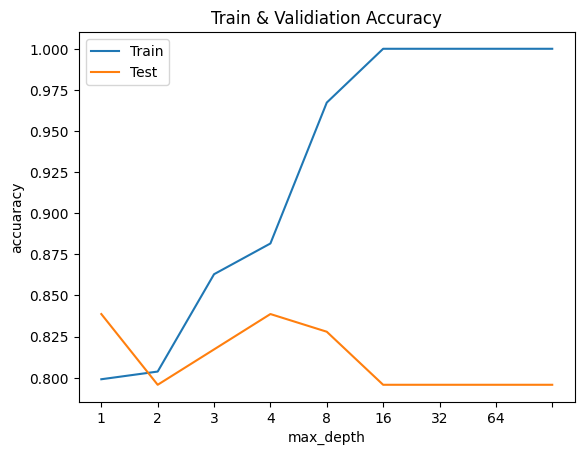

In [17]:
train_accuracy_list = []
val_accuracy_list = []

for max_depths in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=45).fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy = accuracy_score(train_prediction, y_train)
    val_accuracy = accuracy_score(val_prediction, y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuaracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Test'])

Choose Min_sample_split = 300
Choose Maimum Depth as = 2

In [18]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=100, max_depth=3, random_state=45).fit(x_train,y_train)

In [19]:
print(f"Train Accuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}")
print(f"validation Accuracy score: {accuracy_score(decision_tree_model.predict(x_val),y_val):.4f}")
print(f"Test Accuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Train Accuracy score: 0.8084
validation Accuracy score: 0.8065
Test Accuracy score: 0.8251


SVM

In [20]:
from sklearn import svm
#hello
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
print(f"Train Accuracy score: {accuracy_score(classifier.predict(x_train),y_train):.4f}")
print(f"validation Accuracy score: {accuracy_score(classifier.predict(x_val),y_val):.4f}")
print(f"Test Accuracy score: {accuracy_score(classifier.predict(x_test),y_test):.4f}")

Train Accuracy score: 0.8769
validation Accuracy score: 0.8710
Test Accuracy score: 0.8634


RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier

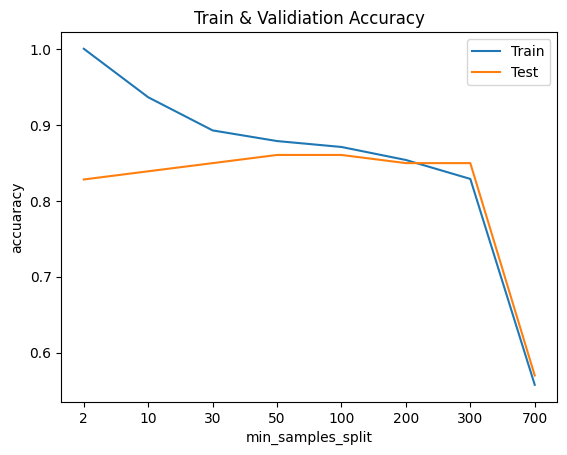

In [23]:
train_accuracy_list = []
val_accuracy_list = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=45).fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    val_prediction= model.predict(x_val)
    train_accuracy = accuracy_score(train_prediction, y_train)
    val_accuracy = accuracy_score(val_prediction, y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('accuaracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Test'])


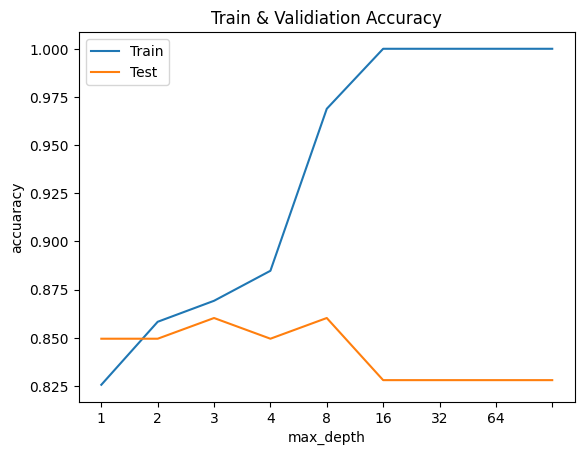

In [24]:
train_accuracy_list = []
val_accuracy_list = []

for max_depths in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depths, random_state=45).fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    val_prediction = model.predict(x_val)
    train_accuracy = accuracy_score(train_prediction, y_train)
    val_accuracy = accuracy_score(val_prediction, y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuaracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Test'])

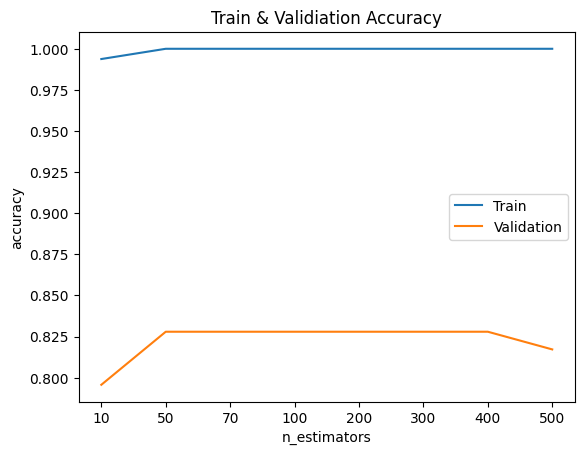

In [25]:
train_accuracy_list = []
val_accuracy_list = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 45).fit(x_train,y_train) 
    train_prediction = model.predict(x_train) 
    val_prediction = model.predict(x_val) 
    train_accuracy = accuracy_score(train_prediction,y_train)
    val_accuracy = accuracy_score(val_prediction,y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Validation'])

In [26]:
RandomForest_model = RandomForestClassifier(n_estimators=100, min_samples_split=30, max_depth=5, random_state=45).fit(x_train,y_train)

In [27]:
print(f"Train Accuracy score: {accuracy_score(RandomForest_model.predict(x_train),y_train):.4f}")
print(f"validation Accuracy score: {accuracy_score(RandomForest_model.predict(x_val),y_val):.4f}")
print(f"Test Accuracy score: {accuracy_score(RandomForest_model.predict(x_test),y_test):.4f}")

Train Accuracy score: 0.8847
validation Accuracy score: 0.8602
Test Accuracy score: 0.8798


XGBoost

In [ ]:
from xgboost import XGBClassifier

[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[10]	validation_0-logloss:0.41954
[11]	validation_0-logloss:0.41073


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.40277
[13]	validation_0-logloss:0.39559
[14]	validation_0-logloss:0.39175
[15]	validation_0-logloss:0.38901
[16]	validation_0-logloss:0.38455
[17]	validation_0-logloss:0.38137
[18]	validation_0-logloss:0.37887
[19]	validation_0-logloss:0.37546
[20]	validation_0-logloss:0.37419
[21]	validation_0-logloss:0.37527
[22]	validation_0-logloss:0.37390
[23]	validation_0-logloss:0.37358
[24]	validation_0-logloss:0.37180
[25]	validation_0-logloss:0.36954
[26]	validation_0-logloss:0.36899
[27]	validation_0-logloss:0.36837
[28]	validation_0-logloss:0.36924
[29]	validation_0-logloss:0.36890
[30]	validation_0-logloss:0.36866
[31]	validation_0-logloss:0.36909
[32]	validation_0-logloss:0.36948
[33]	validation_0-logloss:0.36936
[34]	validation_0-logloss:0.36957
[35]	validation_0-logloss:0.36766
[36]	validation_0-logloss:0.36469
[37]	validation_0-logloss:0.36571
[38]	validation_0-logloss:0.36454
[39]	validation_0-logloss:0.36407
[40]	validation_0-logloss:0.36262
[41]	validatio

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[10]	validation_0-logloss:0.41954
[11]	validation_0-logloss:0.41073
[12]	validation_0-logloss:0.40277
[13]	validation_0-logloss:0.39559
[14]	validation_0-logloss:0.39175
[15]	validation_0-logloss:0.38901
[16]	validation_0-logloss:0.38455
[17]	validation_0-logloss:0.38137
[18]	validation_0-logloss:0.37887
[19]	validation_0-logloss:0.37546
[20]	validation_0-logloss:0.37419
[21]	validation_0-logloss:0.37527
[22]	validation_0-logloss:0.37390
[23]	validation_0-logloss:0.37358
[24]	validation_0-logloss:0.37180
[25]	validation_0-logloss:0.36954
[26]	validation_0-logloss:0.36899
[27]	validation_0-loglos

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.36766
[36]	validation_0-logloss:0.36469
[37]	validation_0-logloss:0.36571
[38]	validation_0-logloss:0.36454
[39]	validation_0-logloss:0.36407
[40]	validation_0-logloss:0.36262
[41]	validation_0-logloss:0.36420
[42]	validation_0-logloss:0.36475
[43]	validation_0-logloss:0.36448
[44]	validation_0-logloss:0.36452
[45]	validation_0-logloss:0.36219
[46]	validation_0-logloss:0.36314
[47]	validation_0-logloss:0.36420
[48]	validation_0-logloss:0.36539
[49]	validation_0-logloss:0.36744
[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[55]	validation_0-logloss:0.37093
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-loglo

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.36454
[39]	validation_0-logloss:0.36407
[40]	validation_0-logloss:0.36262
[41]	validation_0-logloss:0.36420
[42]	validation_0-logloss:0.36475
[43]	validation_0-logloss:0.36448
[44]	validation_0-logloss:0.36452
[45]	validation_0-logloss:0.36219
[46]	validation_0-logloss:0.36314
[47]	validation_0-logloss:0.36420
[48]	validation_0-logloss:0.36539
[49]	validation_0-logloss:0.36744
[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[55]	validation_0-logloss:0.37093
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[10]	validation_0-logloss:0.41954
[11]	validation_0-loglos

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-logloss:0.36420
[42]	validation_0-logloss:0.36475
[43]	validation_0-logloss:0.36448
[44]	validation_0-logloss:0.36452
[45]	validation_0-logloss:0.36219
[46]	validation_0-logloss:0.36314
[47]	validation_0-logloss:0.36420
[48]	validation_0-logloss:0.36539
[49]	validation_0-logloss:0.36744
[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[55]	validation_0-logloss:0.37093
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[10]	validation_0-logloss:0.41954
[11]	validation_0-logloss:0.41073
[12]	validation_0-logloss:0.40277
[13]	validation_0-logloss:0.39559
[14]	validation_0-loglos

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-logloss:0.36924
[29]	validation_0-logloss:0.36890
[30]	validation_0-logloss:0.36866
[31]	validation_0-logloss:0.36909
[32]	validation_0-logloss:0.36948
[33]	validation_0-logloss:0.36936
[34]	validation_0-logloss:0.36957
[35]	validation_0-logloss:0.36766
[36]	validation_0-logloss:0.36469
[37]	validation_0-logloss:0.36571
[38]	validation_0-logloss:0.36454
[39]	validation_0-logloss:0.36407
[40]	validation_0-logloss:0.36262
[41]	validation_0-logloss:0.36420
[42]	validation_0-logloss:0.36475
[43]	validation_0-logloss:0.36448
[44]	validation_0-logloss:0.36452
[45]	validation_0-logloss:0.36219
[46]	validation_0-logloss:0.36314
[47]	validation_0-logloss:0.36420
[48]	validation_0-logloss:0.36539
[49]	validation_0-logloss:0.36744
[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037
[55]	validation_0-logloss:0.37093


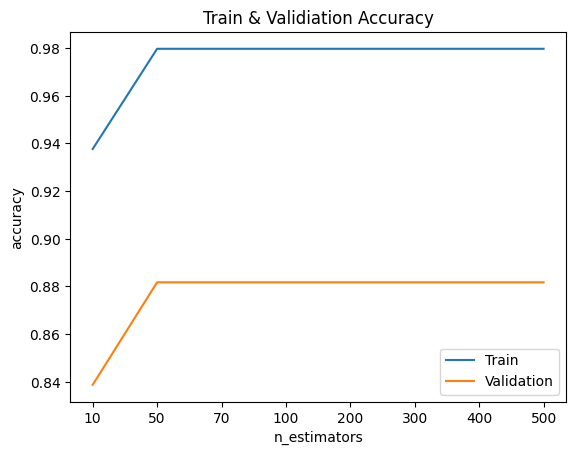

In [ ]:
train_accuracy_list = []
val_accuracy_list = []

for n_estimators in n_estimators_list:
    xgb_model = XGBClassifier(n_estimators = n_estimators, learning_rate = 0.1,verbosity = 1, random_state = 45)
    xgb_model.fit(x_train, y_train, eval_set = [(x_test, y_test)], early_stopping_rounds = 10)
    train_prediction = xgb_model.predict(x_train) 
    val_prediction = xgb_model.predict(x_val) 
    train_accuracy = accuracy_score(train_prediction,y_train)
    val_accuracy = accuracy_score(val_prediction,y_val)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)

plt.title('Train & Validiation Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(train_accuracy_list)
plt.plot(val_accuracy_list)
plt.legend(['Train','Validation'])

In [ ]:
xgb_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1,verbosity = 1, random_state = 45)
xgb_model.fit(x_train, y_train, eval_set = [(x_test, y_test)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.59851
[2]	validation_0-logloss:0.56188
[3]	validation_0-logloss:0.53120
[4]	validation_0-logloss:0.50683
[5]	validation_0-logloss:0.48726
[6]	validation_0-logloss:0.47026
[7]	validation_0-logloss:0.45331
[8]	validation_0-logloss:0.43880
[9]	validation_0-logloss:0.42711
[10]	validation_0-logloss:0.41954
[11]	validation_0-logloss:0.41073
[12]	validation_0-logloss:0.40277
[13]	validation_0-logloss:0.39559
[14]	validation_0-logloss:0.39175
[15]	validation_0-logloss:0.38901
[16]	validation_0-logloss:0.38455
[17]	validation_0-logloss:0.38137
[18]	validation_0-logloss:0.37887
[19]	validation_0-logloss:0.37546
[20]	validation_0-logloss:0.37419
[21]	validation_0-logloss:0.37527
[22]	validation_0-logloss:0.37390
[23]	validation_0-logloss:0.37358
[24]	validation_0-logloss:0.37180
[25]	validation_0-logloss:0.36954
[26]	validation_0-logloss:0.36899
[27]	validation_0-logloss:0.36837


[28]	validation_0-logloss:0.36924
[29]	validation_0-logloss:0.36890
[30]	validation_0-logloss:0.36866
[31]	validation_0-logloss:0.36909
[32]	validation_0-logloss:0.36948
[33]	validation_0-logloss:0.36936
[34]	validation_0-logloss:0.36957
[35]	validation_0-logloss:0.36766
[36]	validation_0-logloss:0.36469
[37]	validation_0-logloss:0.36571
[38]	validation_0-logloss:0.36454


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.36407
[40]	validation_0-logloss:0.36262
[41]	validation_0-logloss:0.36420
[42]	validation_0-logloss:0.36475
[43]	validation_0-logloss:0.36448
[44]	validation_0-logloss:0.36452
[45]	validation_0-logloss:0.36219
[46]	validation_0-logloss:0.36314
[47]	validation_0-logloss:0.36420
[48]	validation_0-logloss:0.36539
[49]	validation_0-logloss:0.36744
[50]	validation_0-logloss:0.36781
[51]	validation_0-logloss:0.36852
[52]	validation_0-logloss:0.36957
[53]	validation_0-logloss:0.37021
[54]	validation_0-logloss:0.37037


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=45, ...)

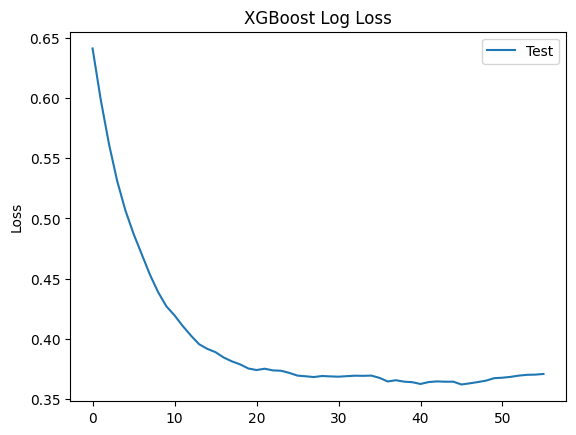

In [ ]:
results = xgb_model.evals_result()

# Extract the log loss values
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Test')
ax.legend()
plt.ylabel('Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [ ]:
xgb_model.best_iteration

45

In [ ]:
print(f"Train Accuracy score: {accuracy_score(xgb_model.predict(x_train),y_train):.4f}")
print(f"validation Accuracy score: {accuracy_score(xgb_model.predict(x_val),y_val):.4f}")
print(f"validation Accuracy score: {accuracy_score(xgb_model.predict(x_test),y_test):.4f}")

Train Accuracy score: 0.9798
validation Accuracy score: 0.8817
validation Accuracy score: 0.8634


KNN Algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [38]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [39]:
print(f"Train Accuracy score: {knn.score(x_train,y_train):.4f}")
print(f"validation Accuracy score: {knn.score(x_test,y_test):.4f}")
print(f"validation Accuracy score: {knn.score(x_val,y_val):.4f}")

Train Accuracy score: 0.7087
validation Accuracy score: 0.6885
validation Accuracy score: 0.6022
